In [38]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pydotplus
from matplotlib.colors import ListedColormap
from IPython.display import display
from sklearn import tree,datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from IPython.display import Image
from sklearn.datasets import load_breast_cancer

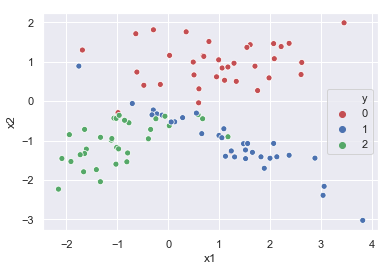

In [14]:
X, y = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)
df=pd.DataFrame(X,columns=['x1', 'x2'])
df['y']=y
df.dtypes
sns.scatterplot(x="x1", y="x2", hue='y', data=df, palette=["r","b","g"]);

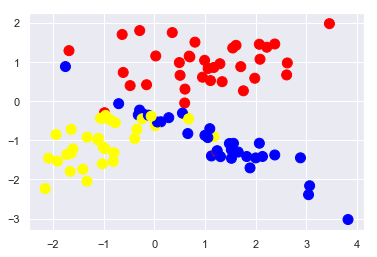

In [15]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
plt.scatter( X[:,0], X[:,1], c=y, cmap=colors, s=100);

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [17]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [18]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors, light_colors):
    
    #fit model
    cls=estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (10, 5))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = light_colors)
   
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors, edgecolors='bk')
    plt.title('Train data, accuracy={:.2f}'.format(estimator.score(train_data,train_labels)))
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.contourf(xx, yy, Z, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors, edgecolors='bk')
    plt.title('Test data, accuracy={:.2f}'.format(estimator.score(test_data,test_labels)))
    plt.show()
    dot_data = tree.export_graphviz(cls, out_file=None,
                        feature_names=['x1','x2'],
                        class_names=['red', 'blue', 'yellow'], filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    display(Image(graph.create_png()))
    return

### DecisionTreeClassifier

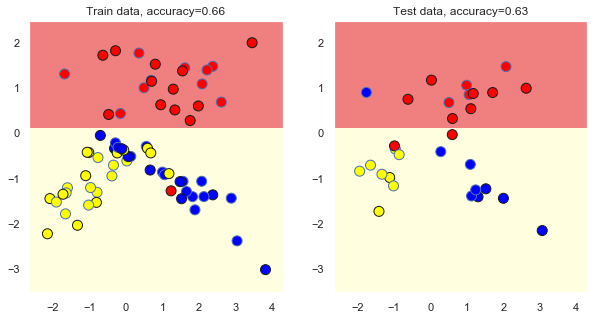

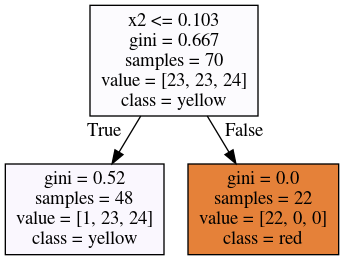

In [19]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
estimator = DecisionTreeClassifier(random_state = 1, max_depth = 1)
plot_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)

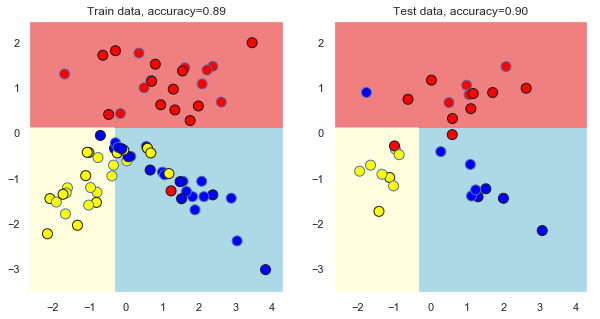

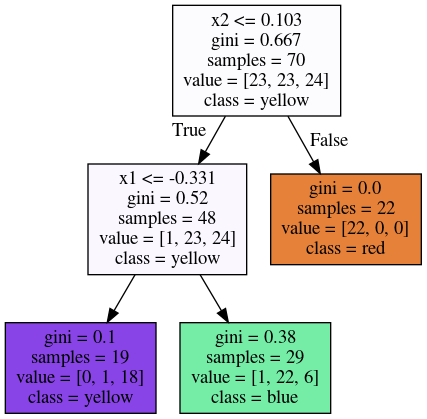

In [20]:
estimator = DecisionTreeClassifier(random_state = 1, max_depth = 2)
plot_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)

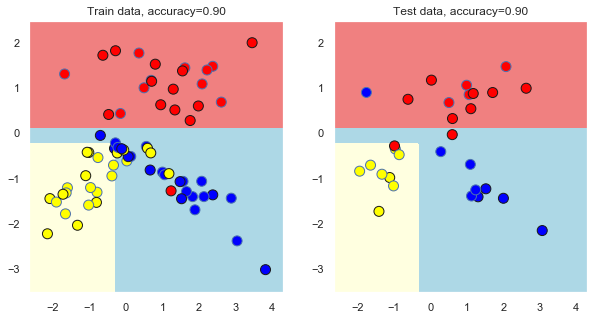

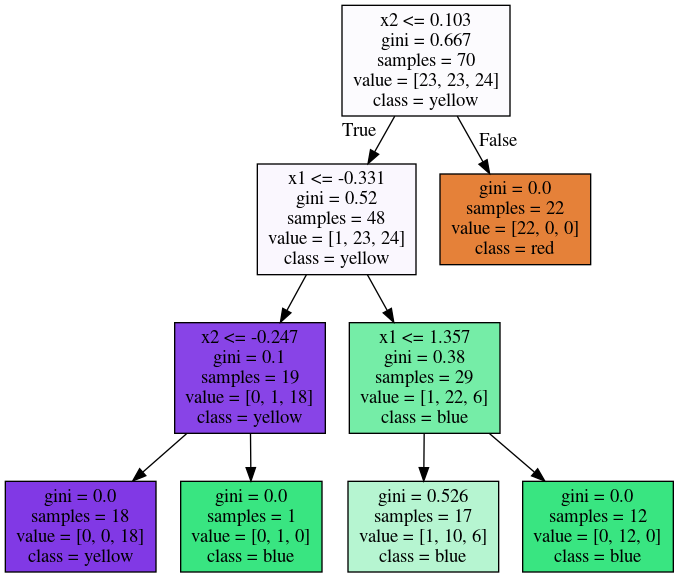

In [21]:
estimator = DecisionTreeClassifier(random_state = 1, max_depth = 3)
plot_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)

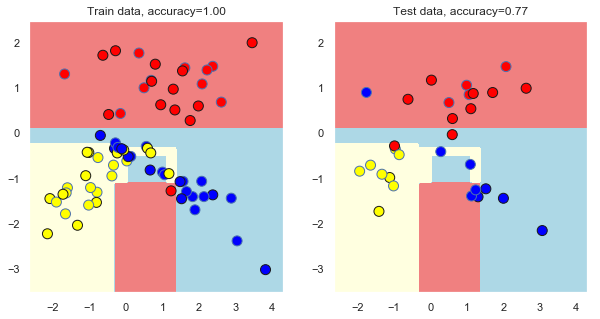

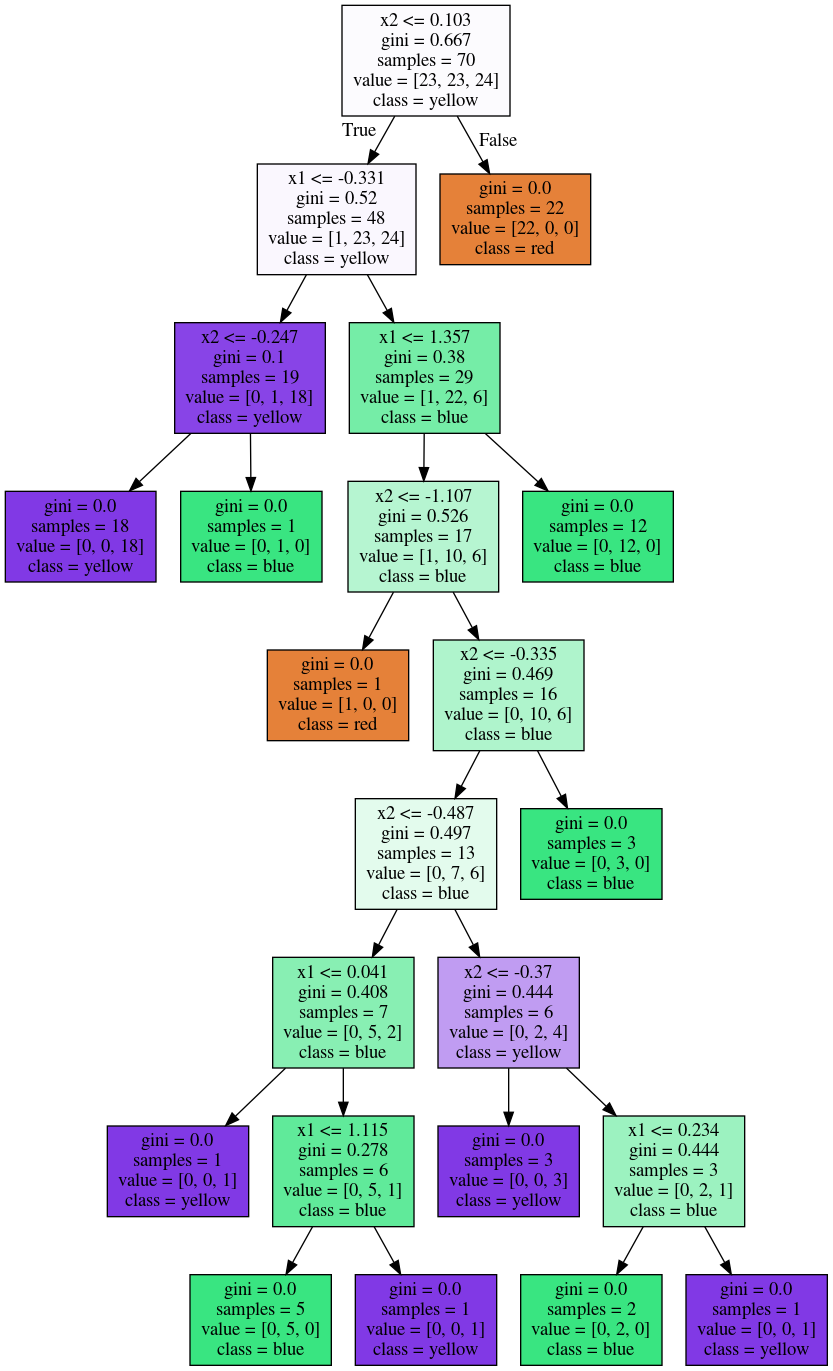

In [22]:
estimator = DecisionTreeClassifier(random_state = 1)
plot_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)

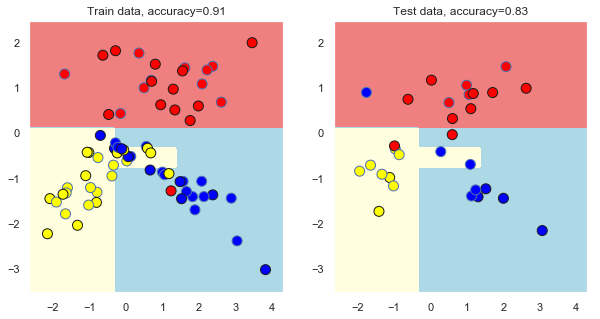

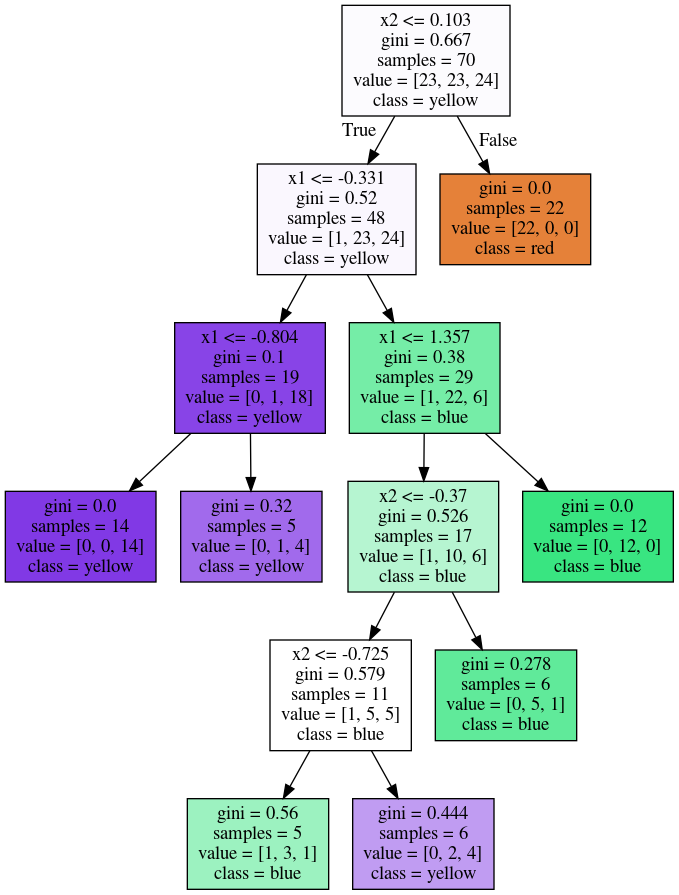

In [23]:
estimator = DecisionTreeClassifier(random_state = 1, min_samples_leaf = 5)
plot_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)

### RandomForestClassifier

In [25]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors, light_colors):
    
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (10, 5))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = light_colors)
   
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors, edgecolors='bk')
    plt.title('Train data, accuracy={:.2f}'.format(estimator.score(train_data,train_labels)))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)

    plt.contourf(xx, yy, Z, cmap = light_colors)

    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors, edgecolors='bk')
    plt.title('Test data, accuracy={:.2f}'.format(estimator.score(test_data,test_labels)))
    plt.show()
    return

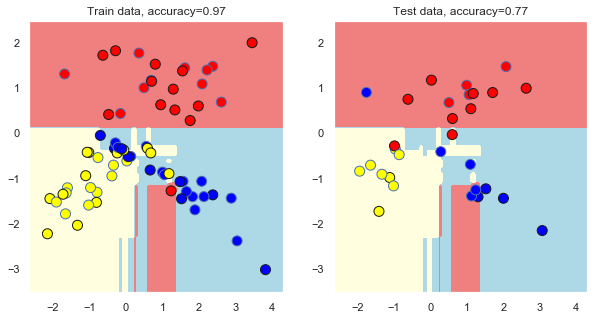

In [26]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
estimator = RandomForestClassifier(n_estimators=5, random_state=2)
plot_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)

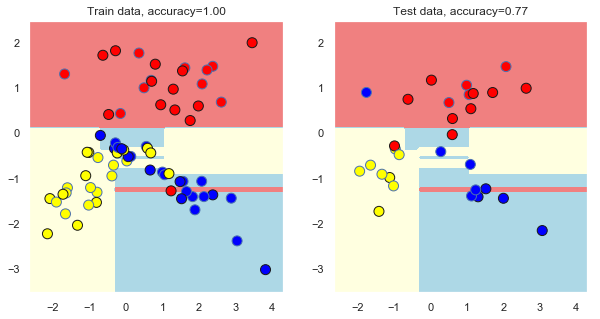

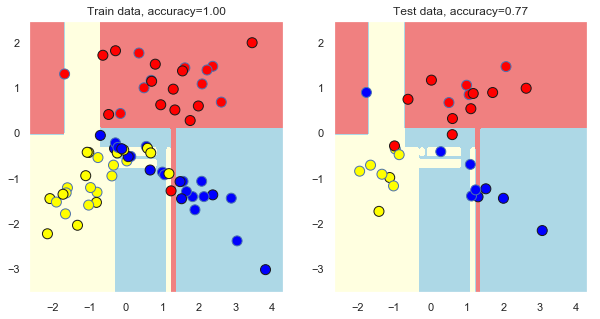

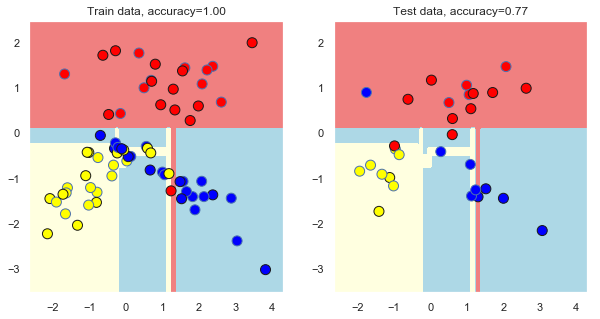

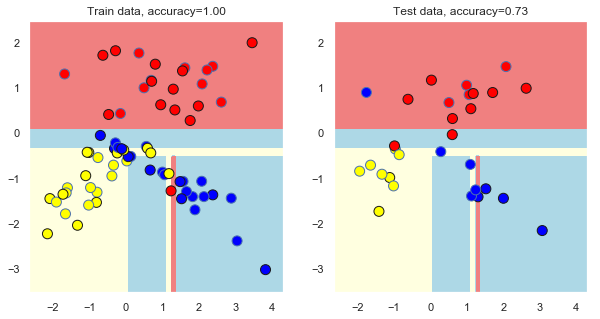

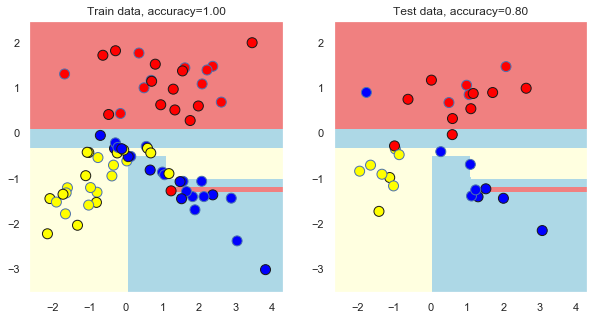

In [27]:
for i in range( len(estimator.estimators_) ):
    plot_decision_surface(estimator.estimators_[i], X_train, y_train, X_test, y_test, colors, light_colors)

In [28]:
rf_1= RandomForestClassifier(n_estimators=5, random_state=2)
rf_1.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(rf_1.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf_1.score(X_test, y_test)))

Правильность на обучающем наборе: 0.971
Правильность на тестовом наборе: 0.767


In [29]:
rf_2= RandomForestClassifier(n_estimators=10, min_samples_leaf = 5,  random_state=2)
rf_2.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(rf_2.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf_2.score(X_test, y_test)))

Правильность на обучающем наборе: 0.900
Правильность на тестовом наборе: 0.900


#### cancer dataset

In [39]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [42]:
forest = RandomForestClassifier(n_estimators=10, random_state=0) 
forest.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.951


In [43]:
forest = RandomForestClassifier(n_estimators=10, max_features=10, random_state=0) 
forest.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 0.995
Правильность на тестовом наборе: 0.972


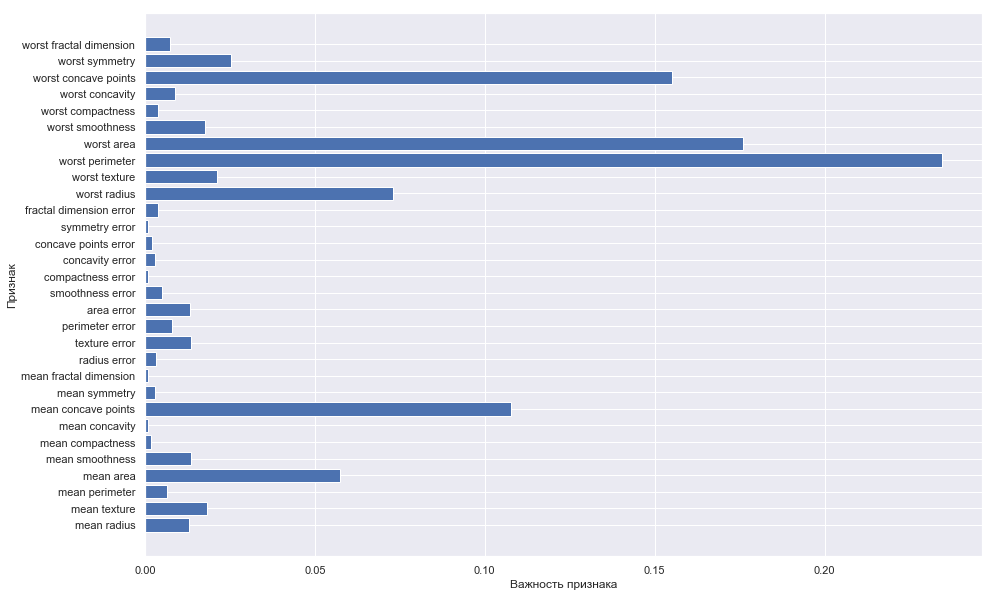

In [44]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancer.feature_names) 
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plt.figure(figsize = (15, 10))
plot_feature_importances_cancer(forest)

### GradientBoostingClassifier

In [46]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.958


In [47]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1) 
gbrt.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.991
Правильность на тестовом наборе: 0.972


In [48]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01) 
gbrt.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.965


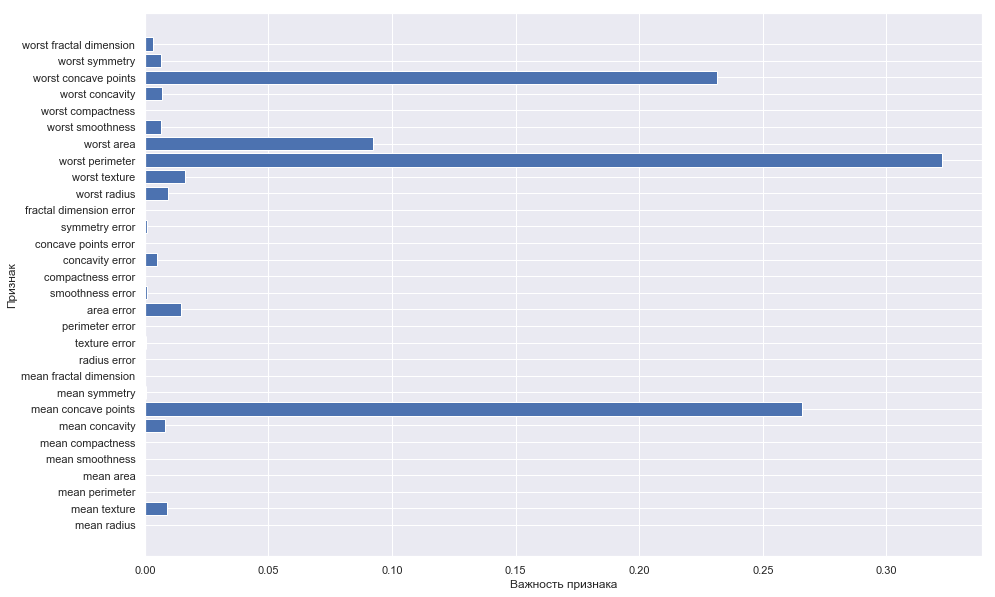

In [49]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1) 
gbrt.fit(X_train, y_train)
plt.figure(figsize = (15, 10))
plot_feature_importances_cancer(gbrt)